# TRABALHANDO COM ARQUIVOS(ENTRADA E SAIDA) ##

### CRIANDO E LENDO ARQUIVOS ###

**Tabela de atributos** 

<table border="1" class="docutils" style="float: left;">
<colgroup>
<col width="11%" />
<col width="89%" />
</colgroup>
<tbody valign="top">
<tr class="row-odd"><td>"r"</td>
<td>ler</td>
</tr>
<tr class="row-even"><td>"r+"</td>
<td>ler, escrever</td>
</tr>
<tr class="row-odd"><td>"w"</td>
<td>escrever, criar, truncar</td>
</tr>
<tr class="row-even"><td>"w+"</td>
<td>ler, escrever, criar, truncar</td>
</tr>
<tr class="row-odd"><td>"a"</td>
<td>escrever, criar, adicionar ao final</td>
</tr>
<tr class="row-even"><td>"a+"</td>
<td>ler, escrever, criar, adicionar ao final</td>
</tr>
</tbody>
</table>

** Criando Arquivos de dados**

In [1]:
arquivo_dados = "arquivo.dat"

"arquivo.dat"

In [2]:
typeof(arquivo_dados)

ASCIIString

** Gravando dados **

Abrir o arquivo criado com atributo de gravação **"w"** e vincular a uma variável chamada *dados*. Se ja foi criado o arquivo use **open("arquivo.dat","w")** senão os dados serão sobreescritos. Sintaxe:
```julia
open(objeto_dados/"arquivo", atributo)
```

In [3]:
dados = open(arquivo_dados, "w")

IOStream(<file arquivo.dat>)

ou direto

In [4]:
dados = open("arquivo.dat", "w")

IOStream(<file arquivo.dat>)

In [5]:
write(dados, "caramba!")
write(dados, "Maluco,")
write(dados, "Eita,")

5

In [6]:
# fechando o arquivo

close(dados)

** Lendo arquivo **

In [7]:
readall("arquivo.dat")

"caramba!Maluco,Eita,"

Atribuindo o arquivo a uma variável para fazer a leitura

In [8]:
# arquivo aberto com atributo de somente leitura

dados = open(arquivo_dados,"r")

IOStream(<file arquivo.dat>)

In [9]:
linha_dados = readall(dados)

"caramba!Maluco,Eita,"

In [10]:
close(dados)

In [11]:
# mesmo depois de fechado, pode ser lido a partir da variável

display(linha_dados)

"caramba!Maluco,Eita,"

** obs** se fizer :

```julia
    readall(dados)

    close(dados)

    display(linha_dados)

```

Não vai aparecer nada! uma vez que o conteúdo não está vinculado à uma variável. Logo, ao fechar o arquivo, não será possível ler

** Exemplo de dados perdidos ao gravar dados em arquivo**

In [12]:
readall("arquivo.dat")

"caramba!Maluco,Eita,"

In [13]:
arquivo_dados = open("arquivo.dat", "w")

IOStream(<file arquivo.dat>)

In [14]:
write(arquivo_dados, "opa ih....!")

11

In [15]:
readall("arquivo.dat")

# não leu nada porque o atributo é somente escrita

""

In [16]:
close(arquivo_dados)

In [17]:
readall("arquivo.dat")

"opa ih....!"

veja que apagou o conteúdo anterior.

** Agora um exemplo com dados incluídos ao final do arquivo**

In [18]:
# ler o ultimo conteúdo gravado no arquivo

readall("arquivo.dat")

"opa ih....!"

In [19]:
#abrindo o arquivo com atributo de ler, escrever, criar e acrescentar conteúdo ao final

arquivo_dados= open("arquivo.dat", "a+")

IOStream(<file arquivo.dat>)

In [20]:
write(arquivo_dados, "ah...!\n")

7

In [21]:
readall("arquivo.dat")

# le o arquivo sem ainda ter gravado os dados da memoria no arquivo em disco

"opa ih....!"

In [22]:
close(arquivo_dados)

In [23]:
readall("arquivo.dat")

"opa ih....!ah...!\n"

***Agora não apagou ;)***

### MATRIZ PARA ARQUIVO ###

Se você tem uma matriz que deseja salvar em um arquivo de texto, ou se você quiser ler dados de um arquivo em uma matriz, você pode usar as funções **writedlm** e **readdlm**.

**writedlm()** escreve o conteúdo de uma matriz (ou qualquer objeto iterável) para um arquivo de texto, e **readdlm()** lê os dados a partir de um arquivo em um array:

In [24]:
# criando uma matriz aleatória de tamanho 5

dados = rand(5,5)

5x5 Array{Float64,2}:
 0.0725039  0.410232   0.0206064  0.318553  0.0838218
 0.96841    0.290194   0.439825   0.467963  0.325435 
 0.714666   0.852339   0.423311   0.791701  0.545493 
 0.555299   0.93653    0.0993202  0.39719   0.27849  
 0.896912   0.0318665  0.172207   0.20401   0.753711 

In [25]:
# escrevendo a matriz em um arquivo chamado "matriz.dat"

writedlm("matriz.dat", dados)

In [26]:
# lendo o arquivo criado

mat_dados = readdlm("matriz.dat")

5x5 Array{Float64,2}:
 0.0725039  0.410232   0.0206064  0.318553  0.0838218
 0.96841    0.290194   0.439825   0.467963  0.325435 
 0.714666   0.852339   0.423311   0.791701  0.545493 
 0.555299   0.93653    0.0993202  0.39719   0.27849  
 0.896912   0.0318665  0.172207   0.20401   0.753711 

In [27]:
# ler o dado da linha 3 e coluna 5

mat_dados[3,5]

0.5454926631064627

In [28]:
# alterar o dado da linha 3 e coluna 5 para 100

mat_dados[3,5] = 100

100

In [29]:
mat_dados

5x5 Array{Float64,2}:
 0.0725039  0.410232   0.0206064  0.318553    0.0838218
 0.96841    0.290194   0.439825   0.467963    0.325435 
 0.714666   0.852339   0.423311   0.791701  100.0      
 0.555299   0.93653    0.0993202  0.39719     0.27849  
 0.896912   0.0318665  0.172207   0.20401     0.753711 

Uma forma de perder os dados gravados. Os dados foram perdidos porque a matriz foi substituida por um vetor. 

In [30]:
b = "apagou tudo"

"apagou tudo"

In [31]:
writedlm("matriz.dat", b)

In [32]:
readdlm("matriz.dat")

10x1 Array{Any,2}:
 "a"
 "p"
 "a"
 "g"
 "o"
 "u"
 "t"
 "u"
 "d"
 "o"

### DATA FRAMES ###

Os dataframes são objetos usados para guardar dados na forma de tabelas. Um data frame possui colunas nomeadas, sendo que todas as colunas possuem a mesma quantidade de linhas. DataFrame é a melhor forma de guardar informações pois além de manter uma boa formatação dos dados, ainda permite que seja gravado em arquivos do tipo CSV, que podem ser abertos e manipulados em softwares de planilha tipo excel ou calc.

* #### CRIAR DATAFRAMES ####

Para criar um dataframe use a sintaxe:
```julia
DataFrame(nome_coluna_1 =[dado1_col_1,dado2_col_1], nome_coluna_2 = [dado1_col_2,dado2_col_2])

ou

nome_dataframe = DataFrame()
nome_dataframe[:nome_coluna_1] = [dado1_col_1,dado2_col_1]
nome_dataframe[:nome_coluna_1] = [dado1_col_1,dado2_col_1]

```
**OBS** : Nomes das colunas não podem ter espaço

In [33]:
using DataFrames

In [34]:
# criar o dataframe.
# Nomes das colunas não podem ter espaço

dados = DataFrame(Nome_do_software =["scilab","julia"], Ano = [2005,2012])

dados

,Nome_do_software,Ano
1,scilab,2005
2,julia,2012


Ou assim:

In [35]:
# Nomes das colunas não podem ter espaço

dados = DataFrame()

dados[:Nome_do_sofware] = ["scilab","julia"]
dados[:Ano]             = [2005,2012]

dados

,Nome_do_sofware,Ano
1,scilab,2005
2,julia,2012


In [36]:
# salvar no arquivo 

writetable("dataframe.dat", dados)

In [37]:
# exibindo o arquivo e o conteúdo 

DataFrames.readtable("dataframe.dat")

,Nome_do_sofware,Ano
1,scilab,2005
2,julia,2012


Outro exemplo

In [38]:
# Nomes das colunas não podem ter espaço

Softwares = DataFrame()

Softwares[:Nome_do_software]  = ["Julia", "SageMath", "Maxima", "Octave","Maxima"]
Softwares[:Ano_de_lancamento] = [2012, 2005, 1980, 2000, 1980]
Softwares[:Site]              = ["julialang.org","sagemath.org","maxima.org","gnu.org/octave", "maxima.org"]

Softwares

,Nome_do_software,Ano_de_lancamento,Site
1,Julia,2012,julialang.org
2,SageMath,2005,sagemath.org
3,Maxima,1980,maxima.org
4,Octave,2000,gnu.org/octave
5,Maxima,1980,maxima.org


In [39]:
# Visualizar cabeçalho das colunas

names(Softwares) 

3-element Array{Symbol,1}:
 :Nome_do_software 
 :Ano_de_lancamento
 :Site             

In [40]:
# saber os tipos dos elementos do dataframe. Aqui temos String (primeira coluna) e tipo Inteiro (segunda coluna)

eltypes(Softwares)

3-element Array{Type{T},1}:
 ASCIIString
 Int64      
 ASCIIString

* **VISUALIZAR E ALTERAR DADOS EM UM DATAFRAME**

Sintaxe:
```julia
DataFrame[coluna_x]              -> Somente os elementos da coluna X
DataFrame[coluna_x][elemento_x]  -> Somente um elemento da coluna X e linha X

DataFrame[coluna_x][elemento_x] = novo_dado -> altera o dado da colunaX e linha X
```

In [41]:
# Visualizando toda a primeira coluna

Softwares[1]

5-element DataArrays.DataArray{ASCIIString,1}:
 "Julia"   
 "SageMath"
 "Maxima"  
 "Octave"  
 "Maxima"  

In [42]:
# acessando o terceiro elemento da primeira coluna

Softwares[1][3]

"Maxima"

In [43]:
Softwares[2] 

5-element DataArrays.DataArray{Int64,1}:
 2012
 2005
 1980
 2000
 1980

In [44]:
Softwares[1][3] = "maXIma"

"maXIma"

In [45]:
Softwares

,Nome_do_software,Ano_de_lancamento,Site
1,Julia,2012,julialang.org
2,SageMath,2005,sagemath.org
3,maXIma,1980,maxima.org
4,Octave,2000,gnu.org/octave
5,Maxima,1980,maxima.org


**Adicionar uma nova linha de dados**

Para adicionar uma nova linha de dados ao final do DataFrame use:
```julia
push!(dataframe, [dado_col_1,dado_col_2])
```
ou
```julia
nome_dataframe = vcat(nome_dadaframe,DataFrame(dado_col1=valor,dado_col2=valor))
```

In [46]:
push!(Softwares, ["FreeMat",2001,"freemat.org"]), push!(Softwares, ["FreeMat",2001,"freemat.org"])

(nothing,nothing)

In [47]:
Softwares

,Nome_do_software,Ano_de_lancamento,Site
1,Julia,2012,julialang.org
2,SageMath,2005,sagemath.org
3,maXIma,1980,maxima.org
4,Octave,2000,gnu.org/octave
5,Maxima,1980,maxima.org
6,FreeMat,2001,freemat.org
7,FreeMat,2001,freemat.org


In [48]:
Softwares = vcat(Softwares,DataFrame(Nome_do_software="asdf",Ano_de_lancamento=10,Site="asdf"))

,Nome_do_software,Ano_de_lancamento,Site
1,Julia,2012,julialang.org
2,SageMath,2005,sagemath.org
3,maXIma,1980,maxima.org
4,Octave,2000,gnu.org/octave
5,Maxima,1980,maxima.org
6,FreeMat,2001,freemat.org
7,FreeMat,2001,freemat.org
8,asdf,10,asdf


* **ORDENANDO OS DADOS EM UM DATAFRAME** 

Veja que será ordenado com base nos valores da primeira coluna e o DataFrame será automaticamente atualizado. ATENÇÃO: O COMANDO É CASE SENSITIVE! "A" e "a" são diferentes. 
Sintaxe:
```julia
sorte!(dataframe)
```
Use somente **sort(dataframe)** sem o "! " para evitar a atualização do vetor

In [49]:
sort!(Softwares)

,Nome_do_software,Ano_de_lancamento,Site
1,FreeMat,2001,freemat.org
2,FreeMat,2001,freemat.org
3,Julia,2012,julialang.org
4,Maxima,1980,maxima.org
5,Octave,2000,gnu.org/octave
6,SageMath,2005,sagemath.org
7,asdf,10,asdf
8,maXIma,1980,maxima.org


In [50]:
# veja que o dataframe Softwares será atualizado automaticamente

Softwares

,Nome_do_software,Ano_de_lancamento,Site
1,FreeMat,2001,freemat.org
2,FreeMat,2001,freemat.org
3,Julia,2012,julialang.org
4,Maxima,1980,maxima.org
5,Octave,2000,gnu.org/octave
6,SageMath,2005,sagemath.org
7,asdf,10,asdf
8,maXIma,1980,maxima.org


* **RETIRAR ELEMENTOS REPETIDOS DE UM DATAFRAME**

O comando **unique!** retira os elementos e atualiza o DataFrame. Para não atualizar e manter os dados do DataFrame. ATENÇÃO: O COMANDO É CASE SENSITIVE! "A" e "a" são diferentes. 
Sintaxe:
```julia
unique!(dataframe)
```
Use somente **unique(dataframe)** sem o "! " para evitar a atualização do vetor

In [51]:
unique!(Softwares)

,Nome_do_software,Ano_de_lancamento,Site
1,FreeMat,2001,freemat.org
2,Julia,2012,julialang.org
3,Maxima,1980,maxima.org
4,Octave,2000,gnu.org/octave
5,SageMath,2005,sagemath.org
6,asdf,10,asdf
7,maXIma,1980,maxima.org


### ARQUIVOS CSV 

A melhor forma de trabalhar com arquivos é salva-los no formato "CSV". ***Comma-separated values*** (ou CSV) é um formato de arquivo que armazena dados tabelados, cujo grande uso data da época dos mainframes. Por serem bastante simples, arquivos .csv são comuns em todas as plataformas de computador. 
    
O CSV é um implementação particular de arquivos de texto separados por um delimitador, que usa a vírgula e a quebra de linha para separar os valores. O formato também usa as aspas em campos no qual são usados os caracteres reservados (vírgula e quebra de linha). Essa robustez no formato torna o CSV mais amplo que outros formatos digitais do mesmo segmento.Fonte:  http://pt.wikipedia.org/wiki/Comma-separated_values. 

Forma geral de um arquivo CSV na forma de texto:
```julia
   nome_coluna_1, nome_coluna_2
   dado_col_1, dado_col_2
```
Uma forma prática de criar arquivos CSV é usando uma planilha (excel, calc-libreoffice/openoffice). Basta preencher os dados nas celulas e depois salvar como CSV.

* ** IMPORTAR UM ARQUIVO CSV**

Para importar os dados de um arquivo CSV, use a sintaxe:

```julia
   DataFrames.readtable("arquivo.csv")
```

In [87]:
using DataFrames, Winston

In [53]:
tabela_dados_reta = DataFrames.readtable("dados_reta.csv")

,x,y
1,0.0,-0.183440428023042
2,0.2,-0.131101157495126
3,0.4,0.0268875670852843
4,0.8,0.110532679260319
5,1.0,0.253944632998395
6,1.2,0.257190123748649
7,1.4,0.531888837111346
8,1.6,0.579048247883555
9,2.0,0.935180993484717
10,2.2,0.916600344376623


In [54]:
# visualizar toda a primeira coluna

tabela_dados_reta[1]

14-element DataArrays.DataArray{Float64,1}:
 0.0
 0.2
 0.4
 0.8
 1.0
 1.2
 1.4
 1.6
 2.0
 2.2
 2.6
 2.8
 3.0
 3.4

In [55]:
# Acessar o 7 elemento da primeira coluna

tabela_dados_reta[1][7]

1.4

In [56]:
# Visualizar toda a segunda coluna

tabela_dados_reta[2]

14-element DataArrays.DataArray{Float64,1}:
 -0.18344  
 -0.131101 
  0.0268876
  0.110533 
  0.253945 
  0.25719  
  0.531889 
  0.579048 
  0.935181 
  0.9166   
  1.13329  
  1.26893  
  1.10203  
  1.13392  

* ** GRÁFICO DE DADOS DE UM ARQUIVO CSV **

In [57]:
using Winston

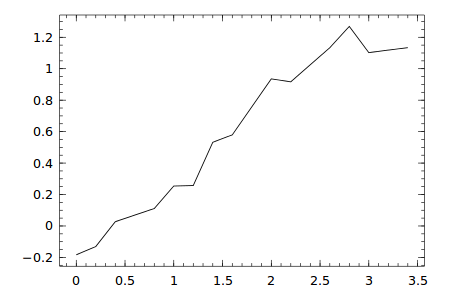

In [58]:
Winston.plot(tabela_dados_reta[1],tabela_dados_reta[2])

* ** EDITAR DADOS E MANIPULAÇÕES ALGÉBRICAS **

Para editar um dado em um dataframe, a sintaxe é:
```julia
dataframe[coluna_x][linha_dado_x] = novo_valor
```

In [59]:
# Visualizar o quinto e sexto dado da coluna 1

tabela_dados_reta[2][5] , tabela_dados_reta[2][6]

(0.253944632998395,0.257190123748649)

In [60]:
# o valor 0 é atribuído ao quinto e sexto dado da coluna 1

tabela_dados_reta[2][5] = 0 ; tabela_dados_reta[2][6] = 0;

In [61]:
# veja o valor 0 

tabela_dados_reta[2]

14-element DataArrays.DataArray{Float64,1}:
 -0.18344  
 -0.131101 
  0.0268876
  0.110533 
  0.0      
  0.0      
  0.531889 
  0.579048 
  0.935181 
  0.9166   
  1.13329  
  1.26893  
  1.10203  
  1.13392  

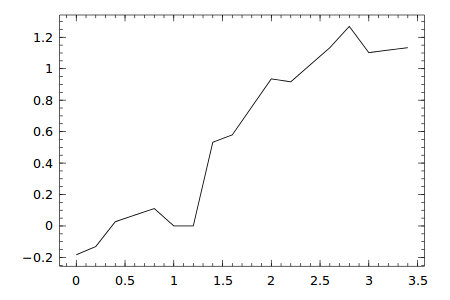

In [62]:
# Gráfico alterado 

Winston.plot(tabela_dados_reta[1],tabela_dados_reta[2])

** Manipulações algebricas **

Com uma coluna de dados pode ser feita qualquer manipulação matemática. No exemplo, os dados da coluna 1 serão multiplicados por 10.

In [63]:
tabela_dados_reta[1]*10

14-element DataArrays.DataArray{Float64,1}:
  0.0
  2.0
  4.0
  8.0
 10.0
 12.0
 14.0
 16.0
 20.0
 22.0
 26.0
 28.0
 30.0
 34.0

In [64]:
# somando todo os elementos da coluna 1

mapreduce(x -> tabela_dados_reta[1][x], + ,1:length(tabela_dados_reta[1]))

22.599999999999998

ou mais facil ainda

In [65]:
sum(tabela_dados_reta[1])

22.599999999999998

In [66]:
# produto dos elementos da coluna 2

prod(tabela_dados_reta[2])

0.0

* ** SALVAR DADOS EM UM ARQUIVO CSV **

Forma geral de um arquivo CSV:
```julia
   writetable("nome.csv", dataframe, separator = ',', header = false)
```
** separator** -> simbolo separador das dados entre as colunas

** header**    -> cabeçalho. destaca os nomes das culunas

In [67]:
# Nomes das colunas não podem ter espaço

Softwares = DataFrame()

Softwares[:Nome_do_software]  = ["Julia", "SageMath", "Maxima", "Octave"]
Softwares[:Ano_de_lancamento] = [2012, 2005, 1980, 2000]

Softwares

,Nome_do_software,Ano_de_lancamento
1,Julia,2012
2,SageMath,2005
3,Maxima,1980
4,Octave,2000


In [68]:
writetable("Softwares1.csv", Softwares, separator = ',', header = true)

In [69]:
# Lendo os dados gravados no arquivo CSV gravado no disco

DataFrames.readtable("Softwares1.csv")

,Nome_do_software,Ano_de_lancamento
1,Julia,2012
2,SageMath,2005
3,Maxima,1980
4,Octave,2000


In [88]:
# Gravando os dados em disco com header (cabeçalho) = false

writetable("Softwares2.csv", Softwares, separator = ',', header = false)

In [71]:
# Lendo os dados gravados no arquivo CSV gravado no disco

DataFrames.readtable("Softwares2.csv")

,Julia,x2012
1,SageMath,2005
2,Maxima,1980
3,Octave,2000


**Outra forma de criar um data frame no formato CSV e salvar gravar arquivo CSV**

In [72]:
Soft = csv"""

Nome_software, Ano_lançamento
Python       , 1991
Scilab       , 2000

"""

,Nome_software,Ano_lançamento
1,Python,1991
2,Scilab,2000


In [73]:
typeof(Soft)

DataFrames.DataFrame

In [74]:
writetable("Soft.csv", Soft, separator = ',', header = true)

DataFrames.readtable("Soft.csv")

,Nome_software,Ano_lançamento
1,Python,1991
2,Scilab,2000


* **APLICAÇÕES**

**Calculando as raízes de uma função e gravando as raízes em um arquivo CSV**

In [118]:
using SymPy, DataFrames

@syms x

(x,)

In [119]:
# Função simbólica - usando o SymPy é melhor usar função do tipo simbólica.
# Se usar f(x) = expressão definido "x" como simbólico, a função será genérica
f  = x - x*cos(x)*exp(x)

# Vetor de valores iniciais (xi)
v = [0 10 15 20 25 30 35 40 50 55]

# Dataframe que vai receber as raízes calculadas de tamanho 10. 
# O tipo dos dados são Array de Float64
Resultado1 = DataFrame(Valor_X = Array(Float64,10), Raiz = Array(Float64,10));

In [120]:
# laço for adiciona o valor de "x" na primeira coluna 1
# e a raiz na coluna 2

for i = 1:length(v)
    Resultado1[1][i] = v[i]
    Resultado1[2][i] = SymPy.nsolve(f, v[i])
end

In [121]:
Resultado1

,Valor_X,Raiz
1,0.0,0.0
2,10.0,4.721292758847686
3,15.0,14.137166216206293
4,20.0,20.42035224697986
5,25.0,23.561944901981953
6,30.0,29.845130209103147
7,35.0,32.98672286269282
8,40.0,39.269908169872416
9,50.0,48.6946861306418
10,55.0,54.977871437821385


**Outra forma**

Criar um DataFrame vazio e ir adicionando ao final tal como um vetor.

In [122]:
# = [] siginifica vetor vazio

Resultado2 = DataFrame(Valor_X = [], Raiz = [])

,Valor_X,Raiz


In [123]:
for i = 1:length(v)
    push!(Resultado2, [v[i],SymPy.nsolve(f, v[i])])
end

In [124]:
Resultado2

,Valor_X,Raiz
1,0.0,0.0
2,10.0,4.721292758847686
3,15.0,14.137166216206293
4,20.0,20.42035224697986
5,25.0,23.561944901981953
6,30.0,29.845130209103147
7,35.0,32.98672286269282
8,40.0,39.269908169872416
9,50.0,48.6946861306418
10,55.0,54.977871437821385


In [125]:
# Testando os resultados 

for i = 1:length(v)
    print(f(Resultado2[2][1])," ; ")
end

0.0 ; 0.0 ; 0.0 ; 0.0 ; 0.0 ; 0.0 ; 0.0 ; 0.0 ; 0.0 ; 0.0 ; 

In [126]:
# Gravando os dados em um arquivo CSV

writetable("Resultado1.csv", Resultado1, separator = ',', header = true)

**Outa forma de adicionar dados ao final de um Dataframe**

Comando vcat. Sintaxe:

```julia
vcat(dataframe_dados, DataFrame(coluna1 = dados, coluna2 = dados))
```

In [127]:
Resultado2 = vcat(Resultado2,DataFrame(Valor_X=60.0,Raiz = SymPy.nsolve(f, 60.0)))

,Valor_X,Raiz
1,0.0,0.0
2,10.0,4.721292758847686
3,15.0,14.137166216206293
4,20.0,20.42035224697986
5,25.0,23.561944901981953
6,30.0,29.845130209103147
7,35.0,32.98672286269282
8,40.0,39.269908169872416
9,50.0,48.6946861306418
10,55.0,54.977871437821385


In [128]:
Resultado2

,Valor_X,Raiz
1,0.0,0.0
2,10.0,4.721292758847686
3,15.0,14.137166216206293
4,20.0,20.42035224697986
5,25.0,23.561944901981953
6,30.0,29.845130209103147
7,35.0,32.98672286269282
8,40.0,39.269908169872416
9,50.0,48.6946861306418
10,55.0,54.977871437821385
